In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as mns 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import requests
import json


In [10]:

# Load the JSON file
json_file_path = "IMDB_250_movies.json"

with open(json_file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Convert list values to plain values
for movie in data:
    for key, value in movie.items():
        if isinstance(value, list):
            if all(isinstance(i, list) for i in value):  # If nested lists exist, flatten them
                movie[key] = ", ".join([", ".join(map(str, sublist)) for sublist in value])
            else:
                movie[key] = ", ".join(map(str, value))

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
csv_file_path = "IMDB_250_movies_cleaned.csv"
df.to_csv(csv_file_path, index=False, encoding="utf-8")

csv_file_path


'IMDB_250_movies_cleaned.csv'

In [11]:
## reading the csv dataset 
df = pd.read_csv("IMDB_250_movies_cleaned.csv")
df.head(6)

,title,movie_rank,genres,release_day,release_month,release_year,movie_length,rating,vote_count,description
0,The Shawshank Redemption,1,Drama,14,10,1994,2:22:00,9.3,3020598,A banker convicted of uxoricide forms a friend...
1,The Godfather,2,"Crime, Drama",24,3,1972,2:55:00,9.2,2108019,The aging patriarch of an organized crime dyna...
2,The Dark Knight,3,"Action, Crime, Drama",18,7,2008,2:32:00,9.0,2996913,When a menace known as the Joker wreaks havoc ...
3,The Godfather Part II,4,"Crime, Drama",18,12,1974,3:22:00,9.0,1419714,The early life and career of Vito Corleone in ...
4,12 Angry Men,5,"Crime, Drama",10,4,1957,1:36:00,9.0,916939,The jury in a New York City murder trial is fr...
5,The Lord of the Rings: The Return of the King,6,"Adventure, Drama, Fantasy",17,12,2003,3:21:00,9.0,2063799,Gandalf and Aragorn lead the World of Men agai...


In [12]:
## checking the shape of the dataset for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          250 non-null    object 
 1   movie_rank     250 non-null    int64  
 2   genres         250 non-null    object 
 3   release_day    250 non-null    int64  
 4   release_month  250 non-null    int64  
 5   release_year   250 non-null    int64  
 6   movie_length   250 non-null    object 
 7   rating         250 non-null    float64
 8   vote_count     250 non-null    int64  
 9   description    250 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 19.7+ KB


### Now we can use the OMDB API to get the other attributes of the dataset i.e. Main Actors, Budget, Box Office Gross, and Awards

In [ ]:
# OMDb API Key
OMDB_API_KEY = "60fded84"

# Function to fetch movie details from OMDb API
def fetch_movie_details(title):
    url = f"http://www.omdbapi.com/?t={title}&apikey={OMDB_API_KEY}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Check if the response is valid
        if data.get("Response") == "True":
            return {
                "title": data.get("Title", title),  # Ensure title matches
                "Cast (Main Actors)": data.get("Actors", "N/A"),
                "Budget": "N/A",  # OMDb does not provide budget info
                "Box Office Gross": data.get("BoxOffice", "N/A"),
                "Awards": data.get("Awards", "N/A")
            }
    
    # If no valid response, return empty data
    return {
        "title": title,
        "Cast (Main Actors)": "N/A",
        "Budget": "N/A",
        "Box Office Gross": "N/A",
        "Awards": "N/A"
    }

# Load your existing CSV file
existing_csv = "IMDB_250_movies_cleaned.csv"
df = pd.read_csv(existing_csv)

# Fetch details for each movie
additional_data = [fetch_movie_details(title) for title in df["title"]]

# Convert the fetched data into a DataFrame
extra_df = pd.DataFrame(additional_data)

# Merge with the existing DataFrame
df = df.merge(extra_df, on="title", how="left")

# Save updated data
new_df_path = "Final_IMDB_250_movies_with_OMDB.csv"
df.to_csv(new_df_path, index=False, encoding="utf-8")

print(f"✅ Updated CSV saved at: {new_df_path}")


✅ Updated CSV saved at: Final_IMDB_250_movies_with_OMDB.csv


In [ ]:
df1 = pd.read_csv("Final_IMDB_250_movies_with_OMDB.csv")

df1.columns


Index(['title', 'movie_rank', 'genres', 'release_day', 'release_month',
       'release_year', 'movie_length', 'rating', 'vote_count', 'description',
       'Cast (Main Actors)', 'Budget', 'Box Office Gross', 'Awards'],
      dtype='object')

<Axes: >

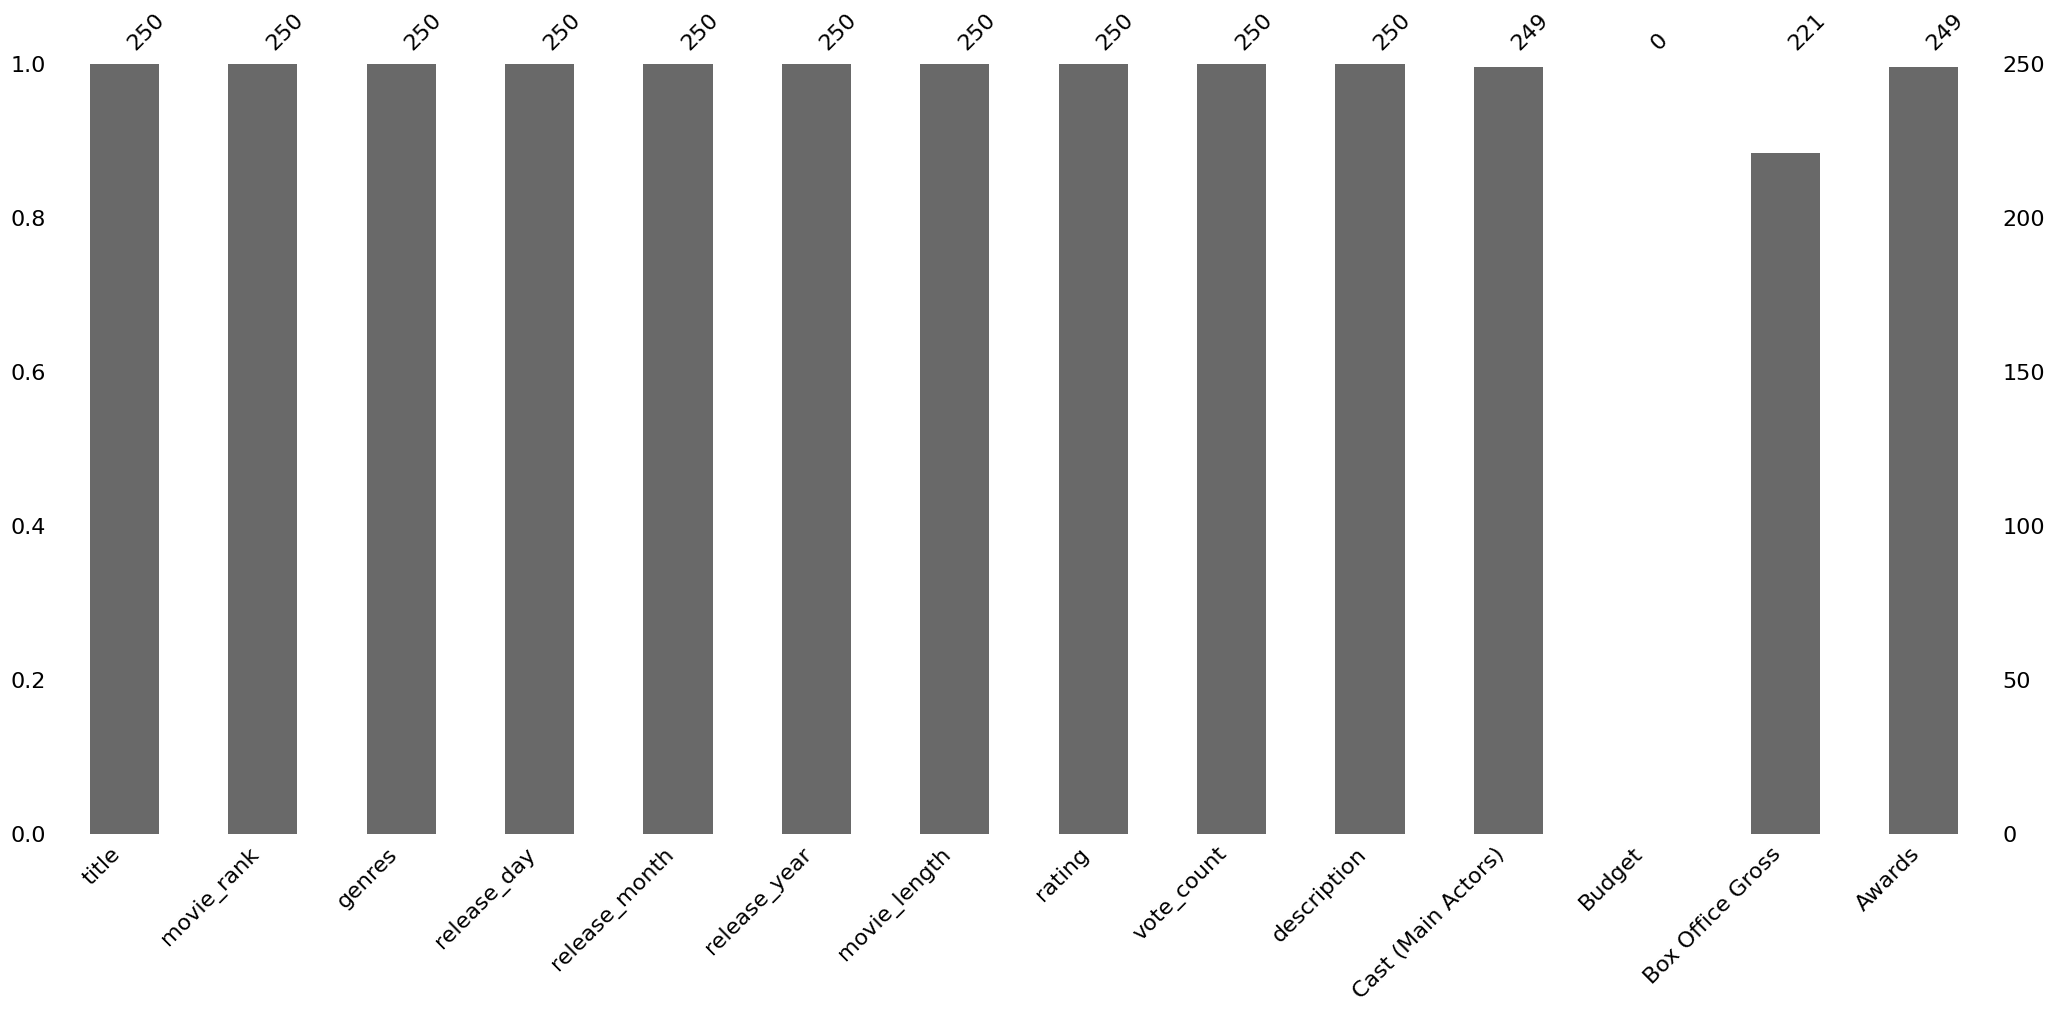

In [21]:
#### checking for missing values in the Box Office column
mns.bar(df1)

In [22]:
#### checking for missing values in the Box Office column
df1.isnull().sum()

title                   0
movie_rank              0
genres                  0
release_day             0
release_month           0
release_year            0
movie_length            0
rating                  0
vote_count              0
description             0
Cast (Main Actors)      1
Budget                250
Box Office Gross       29
Awards                  1
dtype: int64